<a href="https://colab.research.google.com/github/Pratichhya/ubs_course/blob/main/Simple%20Linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Lab: Linear Regression by using the gradient descent algorithm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Utils

In [67]:
#import libraries 

from sklearn import datasets # donnees/ available dataset in sklearn library
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
import seaborn as sns

## Data

In [68]:
#-- Reading the (training) data in a data frame 
dataset=pd.read_csv('/content/drive/MyDrive/ubs/machine learning/pm25_train_data.csv',sep=';')
dataset=dataset.dropna()

In [69]:
#-- Save the explanatory variables in a variable X (and their names in a varaible feature_names), and the target variable in Y
x=dataset[["SO2","NO2","O3","CO","dew point","pressure","rainfall","temperature"]]
y= dataset["PM2.5"]

### Analyser et sélectionner les données étudiées

In [70]:
#-- Display some statistics on the data by using the describe function on the dataframe
x.describe()

,SO2,NO2,O3,CO,dew point,pressure,rainfall,temperature
count,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,21.803471,44.614596,74.123981,1165.918100,2.826747,1009.810802,0.046918,17.943513
std,26.880259,32.895568,51.904421,1010.439512,13.450111,10.075603,0.535652,10.751609
min,0.856800,2.000000,0.214200,100.000000,-31.300000,984.500000,0.000000,-6.800000
25%,4.000000,19.000000,34.000000,500.000000,-8.200000,1001.800000,0.000000,8.200000
50%,12.000000,36.000000,66.000000,900.000000,3.100000,1009.300000,0.000000,20.000000
75%,28.000000,62.000000,103.000000,1500.000000,15.000000,1017.600000,0.000000,27.400000
max,224.000000,273.000000,345.000000,10000.000000,28.500000,1036.300000,31.200000,39.800000


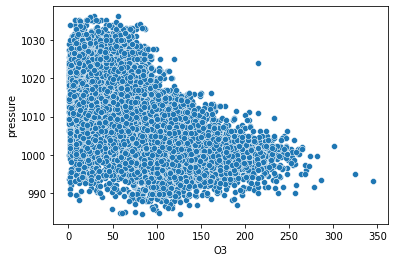

In [71]:
#-- Scatterplots for each explanatory variable
sns.scatterplot(data=dataset, x="O3", y="pressure")

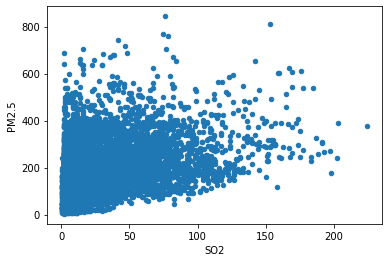

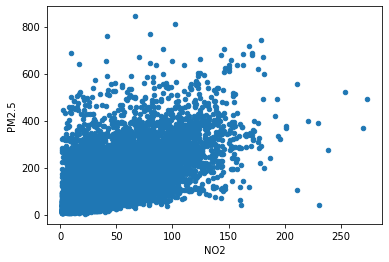

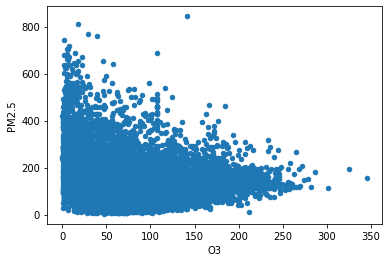

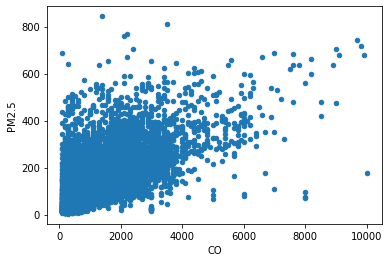

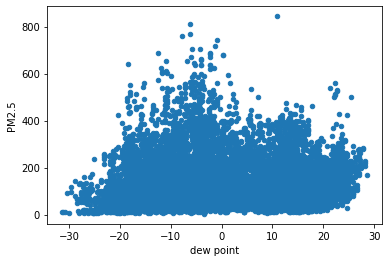

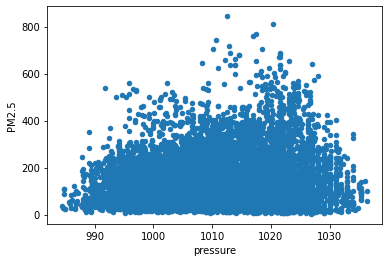

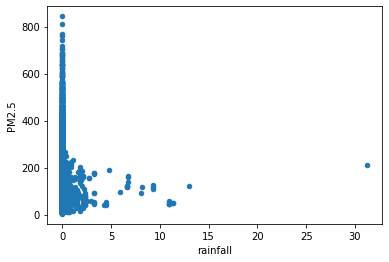

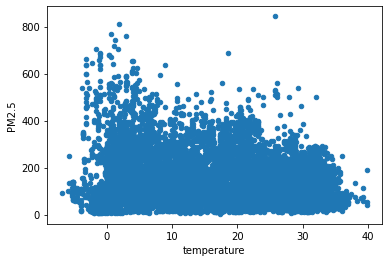

In [72]:

for i in x.columns:
  dataset.plot.scatter(x=i, y="PM2.5")

In [73]:
dataset.corr()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
PM2.5,1.000000,0.485462,0.572813,0.636648,-0.218340,-0.246685,0.140336,-0.029720,-0.037032,-0.187595
SO2,0.485462,1.000000,0.598753,0.630310,-0.287325,-0.366533,0.231831,-0.242011,-0.041511,-0.163247
NO2,0.572813,0.598753,1.000000,0.744382,-0.417748,-0.217173,0.146548,0.014724,-0.009562,-0.347697
CO,0.636648,0.630310,0.744382,1.000000,-0.323917,-0.273665,0.139458,0.041599,0.022054,-0.313852
O3,-0.218340,-0.287325,-0.417748,-0.323917,1.000000,0.683293,-0.555046,0.459740,-0.030031,0.100689
temperature,-0.246685,-0.366533,-0.217173,-0.273665,0.683293,1.000000,-0.811459,0.810234,-0.001144,-0.093390
pressure,0.140336,0.231831,0.146548,0.139458,-0.555046,-0.811459,1.000000,-0.716093,-0.030913,0.062114
dew point,-0.029720,-0.242011,0.014724,0.041599,0.459740,0.810234,-0.716093,1.000000,0.087952,-0.350106
rainfall,-0.037032,-0.041511,-0.009562,0.022054,-0.030031,-0.001144,-0.030913,0.087952,1.000000,-0.035374
windspeed,-0.187595,-0.163247,-0.347697,-0.313852,0.100689,-0.093390,0.062114,-0.350106,-0.035374,1.000000


### so above table shows there is comparative correlation of PM2.5 with SO2, NO2 and CO

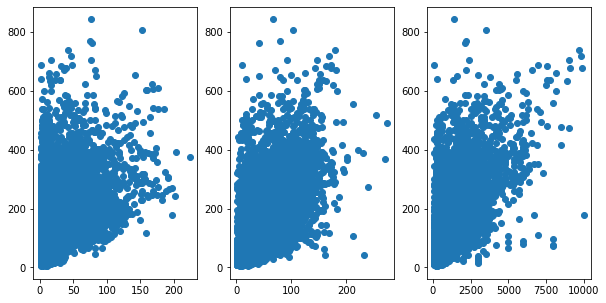

In [74]:
#-- Select the explanatory variables for the simple linear regression, then the multiple linear regression, and display the scatter plots
plt.figure(figsize=(10,5))
plt.subplot(131).scatter(x["SO2"], y)
plt.subplot(132).scatter(x["NO2"], y)
plt.subplot(133).scatter(x["CO"], y)
plt.show()



In [75]:
#-- Extract the data and creates two X matrices that will be used for the regression (have a look at page 26 to know the form of X):
#---- Xs for simple lin reg and Xm for multiple lin reg
Xs=x['SO2'].values
Xm=x[['SO2','NO2','CO']].values

#-- Check the size of both matrices
print(Xs.shape)
print(Xm.shape)
## Hint: use stack/hstack/vstack

(11160,)
(11160, 3)


In [12]:
#--- Write the standardisation function to mean-center the X data
def standardisation(x):
  #check dimension:
  mean=np.mean(x, axis=0)
  std=np.std(x, axis=0, ddof=1)
  n=((x-mean)/std)
  return n


Xs_norm=standardisation(Xs)
print(stats.describe(Xs_norm))
Xm_norm=standardisation(Xm)

DescribeResult(nobs=11160, minmax=(-0.7792585317489189, 7.522119947900833), mean=0.0, variance=1.0, skewness=2.3582118535365915, kurtosis=6.992196050163573)


In [13]:
print(Xs_norm.shape)
z = np.ones((11160, 1))

(11160,)


In [14]:
#-- Preparing the matrix used for the regression linear when using the gradient descent algorithm (add 1 vector column)
Xs_final=np.column_stack((z,Xs_norm))
Xm_final=np.column_stack((z,Xm_norm))

In [15]:
Xs_final

array([[ 1.        , -0.55071906],
       [ 1.        ,  0.11891735],
       [ 1.        ,  2.05342255],
       ...,
       [ 1.        ,  0.90015984],
       [ 1.        , -0.55071906],
       [ 1.        , -0.36470895]])

## Least squares or maximum likelihood solution

In [16]:
Y=y.to_numpy()

In [38]:
#-- To compare the results of the gradient descent algorithm, we will first implement an exact solution with the maximum likelihood
#Formulae recall: (X^T X)^-1 X^T Y
def coef_ml(x,y):
  m = np.dot(x.T, x)
  inv = np.linalg.inv(m)
  n = np.dot(x.T, y)
  beta = np.dot(inv,n)
  return beta
  
  
Xs_B = coef_ml(Xs_final,Y)
Xm_B = coef_ml(Xm_final,Y)

print(Xs_B)
print(Xm_B)
#the function can be removed
#-- (We can also use the native functions of Scikit-Learn, but they are more parameters that needs to be tuned)

[144.78560932  49.96698357]
[144.78560932  10.09815632  19.89592831  44.35291959]


In [18]:
Xm_B.shape

(4,)

## Gradient descent algorithm

In the following we will implement several functions to apply linear regression.
These functions should be generic and work for any number of explanatory varaibles. You should be able to apply them to Xs and Xm standardized variables.

WARNING: parameters of the functions needs to be completed

In [19]:
Xs_final.shape
Xs_B.shape

(2,)

In [20]:
#-- Model
#f(x)=B0+B1X1+B2X2+B3X3
def f(x,b):
  return np.dot(x,b)

Xs_func= f(Xs_final,Xs_B)       #function call for simple regression
Xm_func= f(Xm_final,Xm_B)       #function call for multiple regression
Xm_func

array([ 82.09399419, 153.29661435, 217.46870806, ..., 267.27543366,
        92.08257216, 148.27522406])

In [61]:
#%% Cost function
def cout(x,y,beta):
  m= y.shape[0]
  JB=np.sum((np.square(f(x,beta)-Y)))/(2*m)
  #JB=(np.square(g-y))/(2*m)
  return JB

Xs_JB=cout(Xs_final,Y,Xs_B)           #function call for simple regression
Xm_JB=cout(Xm_final,Y,Xm_B)           #function call for multiple regression
print(Xm_JB)
print(Xs_JB)

3004.7105796697406
4048.24427128641


In [62]:
#%% Computation of the gradient
def grad(x,y,beta):
    m = x.shape[0]
    return 1/m * np.dot(f(x,beta)-y,x)        #(d(J(B))/d(B)) i.e 1/m((f-y).x)


Xs_gradient=grad(Xs_final,Y,Xs_B)    #function call for simple regression
Xm_gradient=grad(Xm_final,Y,Xm_B)    #function call for multiple regression
Xm_gradient

array([-1.94775299e-14, -2.65269288e-14,  2.95830266e-14,  3.38411895e-14])

In [108]:
#gradient descent algorithm
def grad_descent(x,y,beta,alpha,itre):
  #size of observations
  betashape=x.shape[1]

  #list to store the beta values and cost values
  betas=np.zeros((itre,betashape))
  costs=[]

  #calculate the beta values for each iteration
  for i in range(itre):
    beta=beta-alpha*grad(x,y,beta)
    betas[i,:]=beta
    cost=cout(x,y,beta)
    if len(costs)>2 and costs[-1]-cost<0.001:
      break
    costs.append(cost)
  return beta, betas, costs


## Experiment with several initialisations: visualisation of the cost function and parameter values during the iterations

[143.81329181  49.62197827]


Text(0.5, 1.0, 'Cost vs Iterations Analysis')

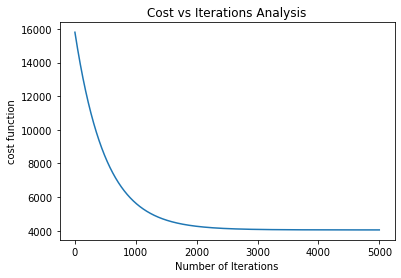

In [121]:
# Learning Rate
betashape=Xs_final.shape[1]

alpha = 0.001
iter=5000

#initializing value
beta=np.random.randn(betashape,)
#calling gradient descent function
beta,betas,costs= grad_descent(Xs_final,Y,beta,alpha,iter)
optimised_bs=betas[len(costs)-1]
print(optimised_bs)
# Plotting Line Plot for Number of Iterations vs MSE
plt.plot(range(len(costs)),costs)
plt.xlabel('Number of Iterations')
plt.ylabel('cost function')
plt.title('Cost vs Iterations Analysis')

[143.81285368  12.10031021  22.57676525  39.85482996]


Text(0.5, 1.0, 'Cost vs Iterations Analysis')

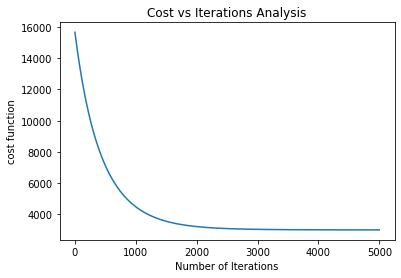

In [122]:
# Learning Rate
betashape=Xm_final.shape[1]

alpha = 0.001
iter=5000

#initializing value
beta=np.random.randn(betashape,)
#calling gradient descent function
beta,betas,costs= grad_descent(Xm_final,Y,beta,alpha,iter)
optimised_bs=betas[len(costs)-1]
print(optimised_bs)
# Plotting Line Plot for Number of Iterations vs MSE
plt.plot(range(len(costs)),costs)
plt.xlabel('Number of Iterations')
plt.ylabel('cost function')
plt.title('Cost vs Iterations Analysis')

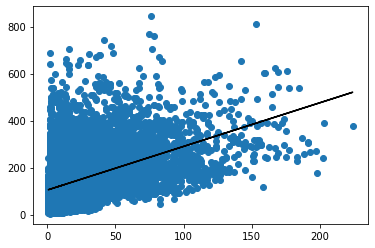

In [123]:
#plot linear
plt.scatter(x['SO2'],Y)
plt.plot(x['SO2'], Xs_func, color="black")


## Experiment with several learning rates: visualisation of the cost function and parameter values during the iterations

[0. 0. 0. 0.]


Text(0.5, 1.0, 'Analysis when value of learning rate is increased')

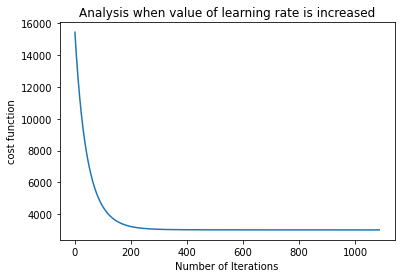

In [127]:
# Learning Rate
betashape=Xm_final.shape[1]

alpha = 0.01
iter=5000

#initializing value
beta=np.random.randn(betashape,)
#calling gradient descent function
beta_1,betas_1,costs_1= grad_descent(Xm_final,Y,beta,alpha,iter)
optimised_bs_1=betas[len(costs_1)-1]
print(optimised_bs_1)
# Plotting Line Plot for Number of Iterations vs MSE
plt.plot(range(len(costs_1)),costs_1)
plt.xlabel('Number of Iterations')
plt.ylabel('cost function')
plt.title('Analysis when value of learning rate is increased')

[0. 0. 0. 0.]


Text(0.5, 1.0, 'Analysis when value of learning rate is decreased')

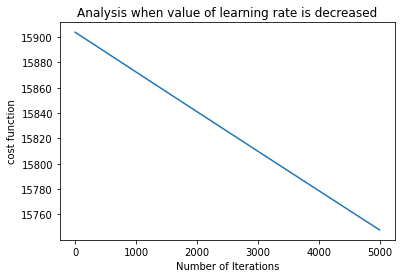

In [129]:
# Learning Rate
betashape=Xm_final.shape[1]

alpha = 0.000001
iter=5000

#initializing value
beta=np.random.randn(betashape,)
#calling gradient descent function
beta_2,betas_2,costs_2= grad_descent(Xm_final,Y,beta,alpha,iter)
optimised_bs_2=betas[len(costs_2)-1]
print(optimised_bs_2)
# Plotting Line Plot for Number of Iterations vs MSE
plt.plot(range(len(costs_2)),costs_2)
plt.xlabel('Number of Iterations')
plt.ylabel('cost function')
plt.title('Analysis when value of learning rate is decreased')

**Notes:**

## Notes
**on the choice of the stopping criterion:**





**on the data normalisation:**





**Notes:**